In [1]:
%matplotlib inline
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt

In [2]:
import wget
import viz

Loading BokehJS ...

In [3]:
plt.rc('font',**{'size':16})

In [ ]:
wget.download('https://tigress-web.princeton.edu/~hsiehtl/snapshots/AM2.5C360_CTL1990s_tigercpu_intelmpi_18_1080PE_4xdaily_len17.nc')
wget.download('https://tigress-web.princeton.edu/~hsiehtl/snapshots/AM2.5C360_CTL1990s_tigercpu_intelmpi_18_1080PE_daily_len5.nc')

### 2d fields (6 hourly instantaneous snapshots)

In [ ]:
ds = xr.open_dataset('AM2.5C360_CTL1990s_tigercpu_intelmpi_18_1080PE_4xdaily_len17.nc')

In [5]:
## movie
itrack = 20
viz.movie(ds['WVP'][itrack], xarray=True, sizefac=10)

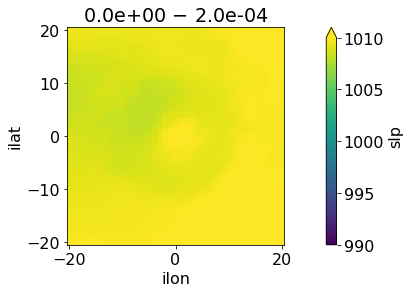

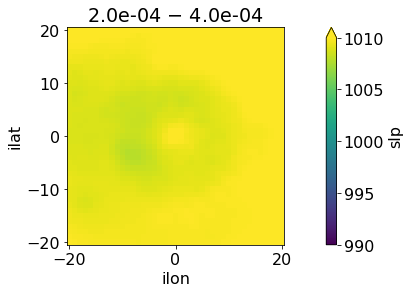

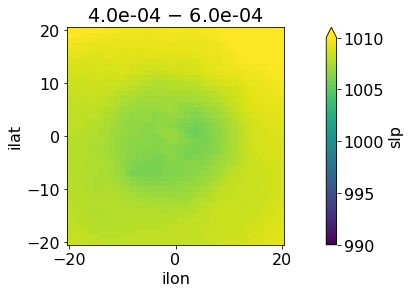

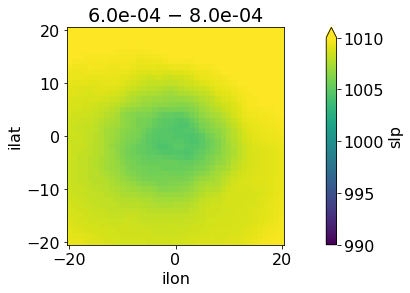

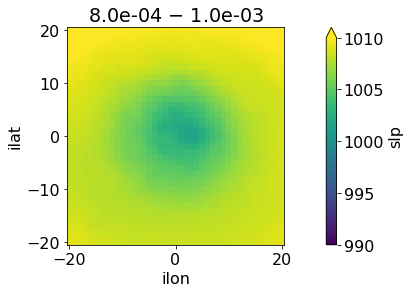

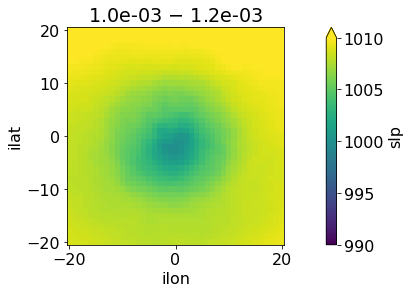

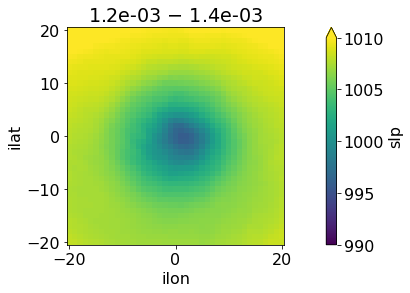

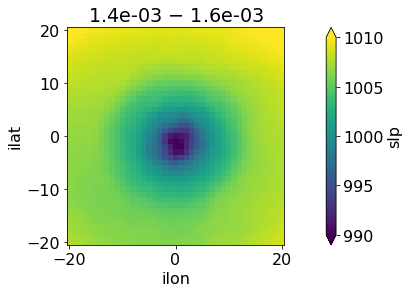

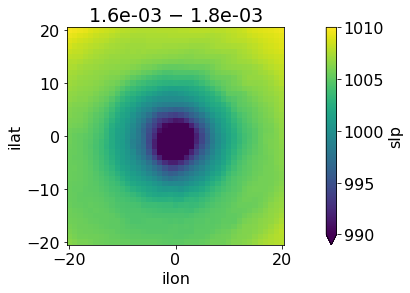

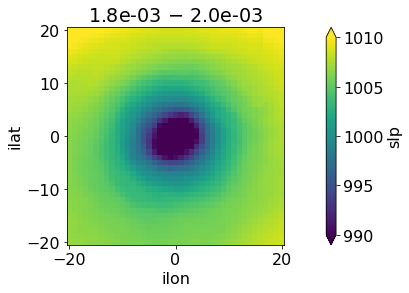

In [6]:
## composite of sea level pressure binned by vorticity
dvort = 2e-4
latlim = (10, 12)

for vort_thresh in np.arange(10)*dvort:
    plt.figure()
    C1 = (vort_thresh < ds.vort_max)*(ds.vort_max < vort_thresh+dvort)
    C2 = (latlim[0] < ds.lat_centroid.isel(lifetime=0))*(ds.lat_centroid.isel(lifetime=0) < latlim[1])
    
    da = ds['slp'].where(C1*C2)
    da.mean(['track', 'lifetime']).plot(vmin=990, vmax=1010)
    
    plt.title('%.1e $-$ %.1e'%(vort_thresh, vort_thresh+dvort))
    plt.axis('square')
    # print('sample size', np.sum(~np.isnan(da.values))/(len(da.ilat)*len(da.ilon)))

### 3d fields (daily mean)

In [ ]:
ds = xr.open_dataset('AM2.5C360_CTL1990s_tigercpu_intelmpi_18_1080PE_daily_len5.nc')

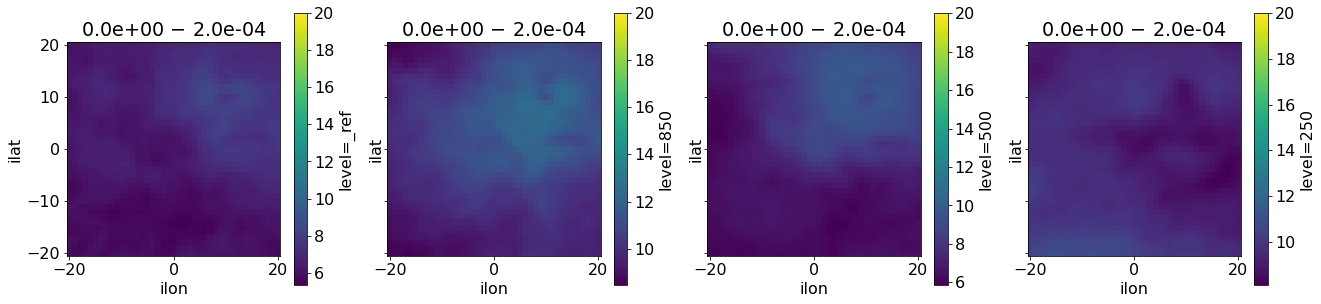

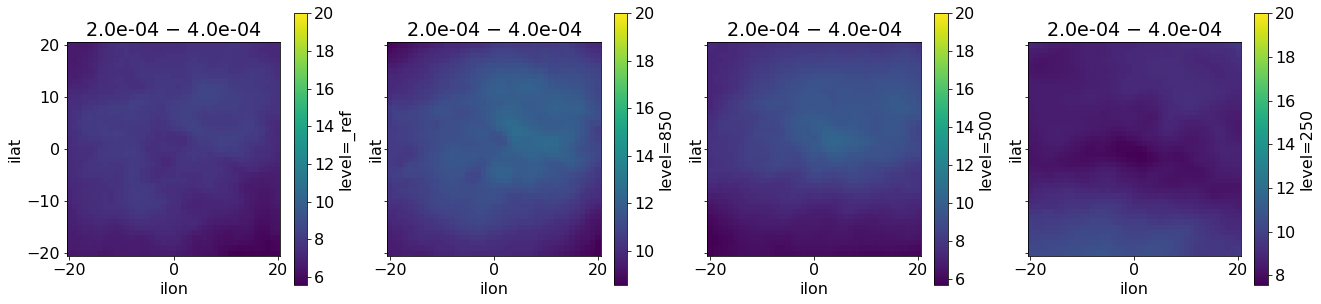

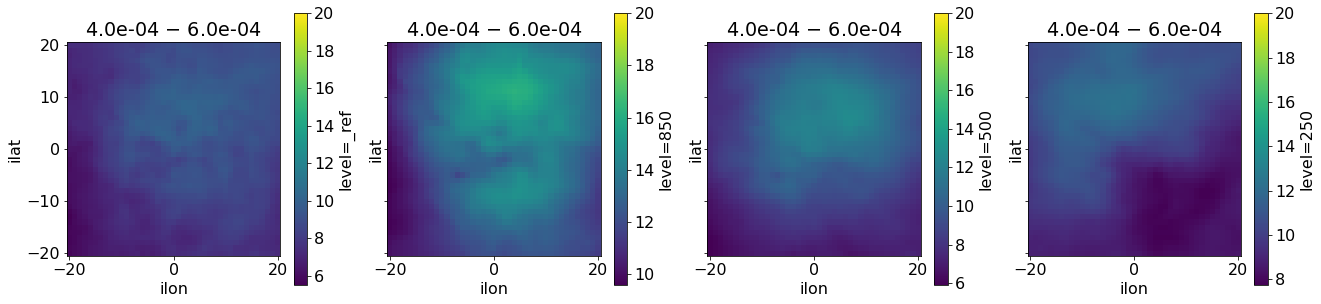

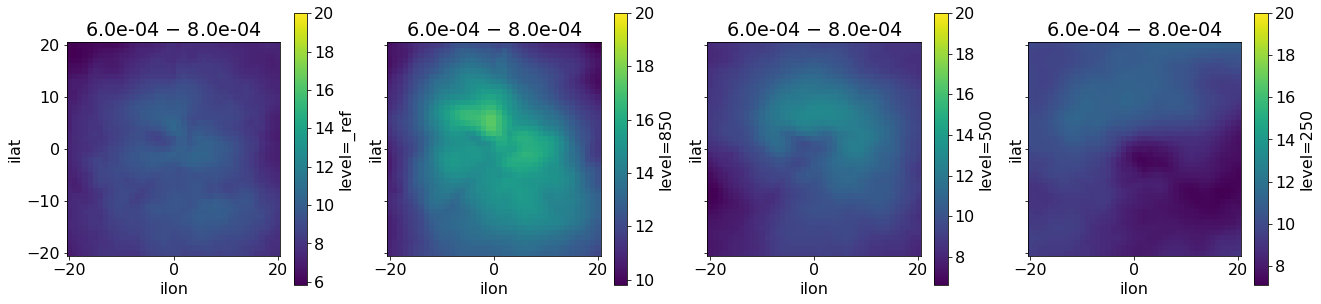

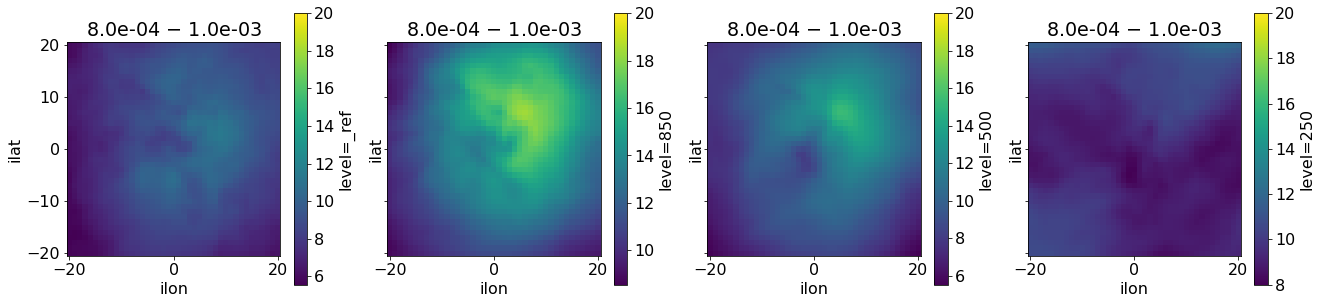

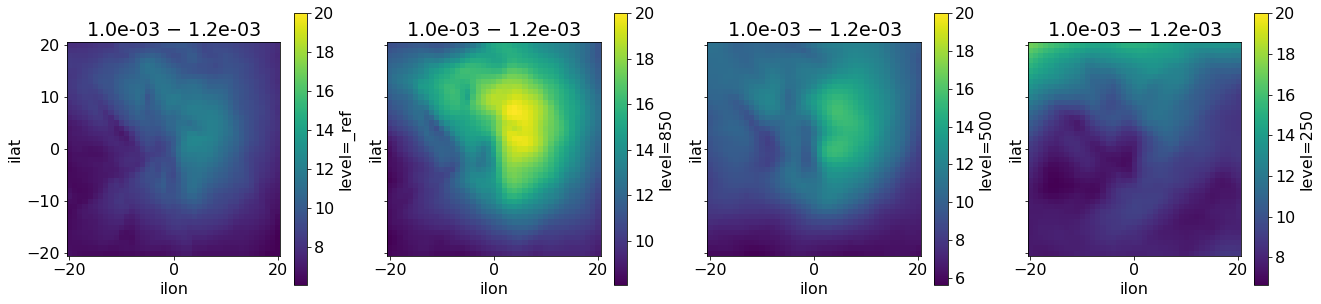

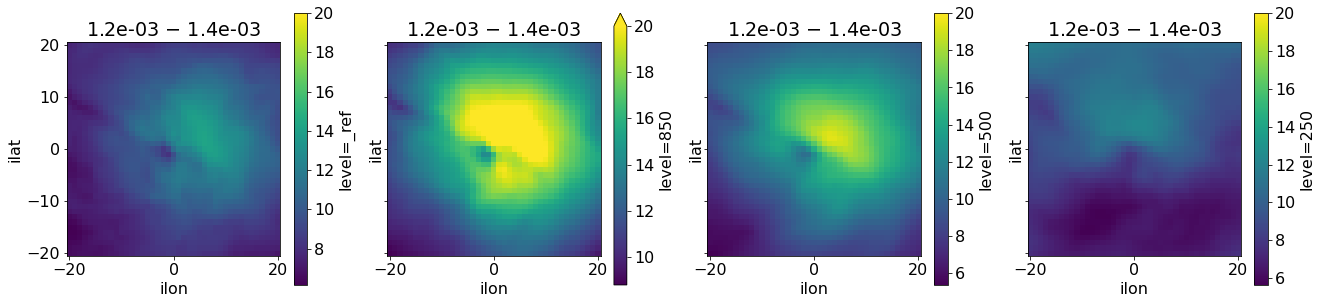

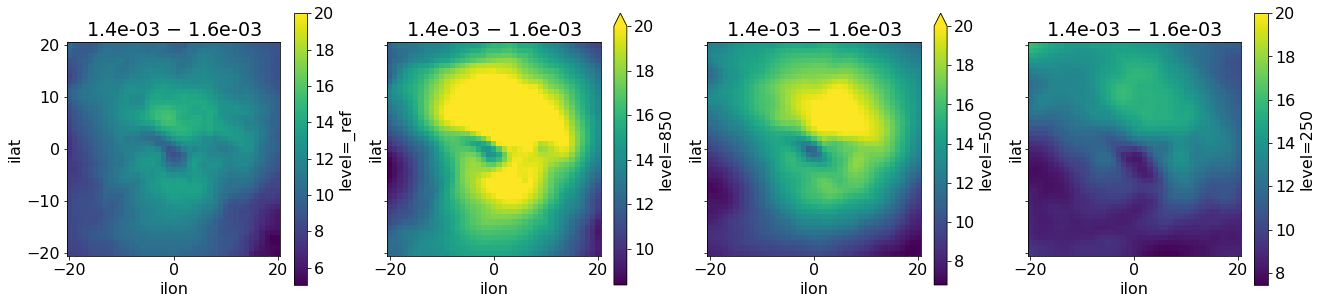

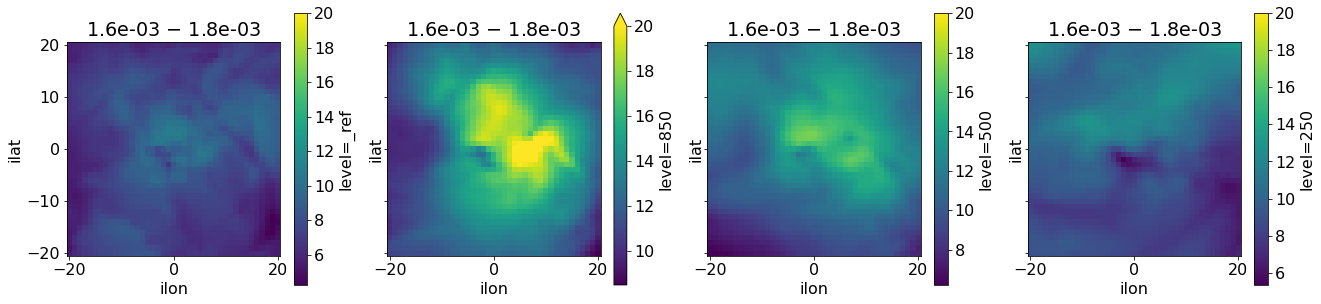

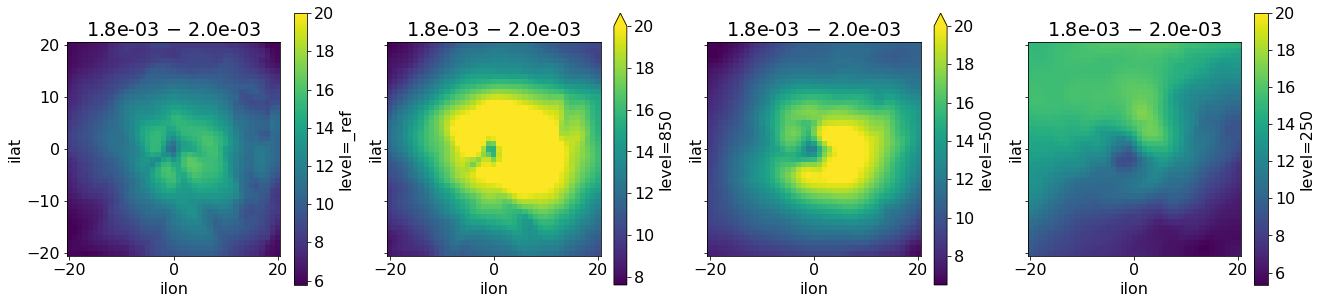

In [8]:
## composite of wind speed binned by vorticity
dvort = 2e-4
latlim = (0, 20)

for vort_thresh in np.arange(10)*dvort:
    fig, ax = plt.subplots(1, 4, figsize=(22, 5), sharex=True, sharey=True, facecolor='w')
    C1 = (vort_thresh < ds.vort_max)*(ds.vort_max < vort_thresh+dvort)
    C2 = (latlim[0] < ds.lat_centroid.isel(lifetime=0))*(ds.lat_centroid.isel(lifetime=0) < latlim[1])
    
    for a, level in zip(ax, ['_ref', '850', '500', '250']):
        plt.sca(a)
        da = np.sqrt(ds[f'u{level}']**2 + ds[f'v{level}']**2).where(C1*C2)
        da.mean(['track', 'lifetime']).plot(ax=a, vmax=20, cbar_kwargs={'label':f'level={level}'})
        plt.title('%.1e $-$ %.1e'%(vort_thresh, vort_thresh+dvort))
        plt.axis('square')
        
    # print('sample size', np.sum(~np.isnan(da.values))/(len(da.ilat)*len(da.ilon)))